In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

+ itertools
    + 반복자 

+ set 자료형
    + 집합의 생각하면됨
    + 순서가 없고
    + 중복이 없다

$S_t \geq \max\{0, S_{t-1} + y_t + - E_{t-1}[Y_t]\} $

```python
import itertools as it 

h=0.005
tmp = np.log(df.close).diff().fillna(0)

tmp_p = list(it.accumulate(tmp, lambda x, y: max(x+y, 0) if (x+y) < h else 0))
tmp_n = list(it.accumulate(tmp, lambda x, y: min(x+y, 0) if (x+y) < -h else 0))

s1 = [index for index, value in enumerate(tmp_p) if value ==0]
s2 = [index for index, value in enumerate(tmp_n) if value ==0]

print(set(s1) & set(s2))

```

https://docs.python.org/3.4/library/itertools.html

Iterator	|Arguments	|Results	|Example
---|---|---|---
accumulate()	|p [,func]	|p0, p0+p1, p0+p1+p2, ...	|accumulate([1,2,3,4,5]) --> 1 3 6 10 15

rough skeetch of accumulate

```python
def accumulate(inputs, func):
    itr = iter(inputs)
    prev = next(itr)
    for cur in itr:
        yield prev
        prev = func(prev, cur)
        ```

### 준비

,close
timestamp,
2019-06-07 12:19:00,269.600006
2019-06-07 13:20:00,268.850006
2019-06-07 14:08:00,268.149994
2019-06-07 14:34:00,267.200012
2019-06-07 15:01:00,266.950012


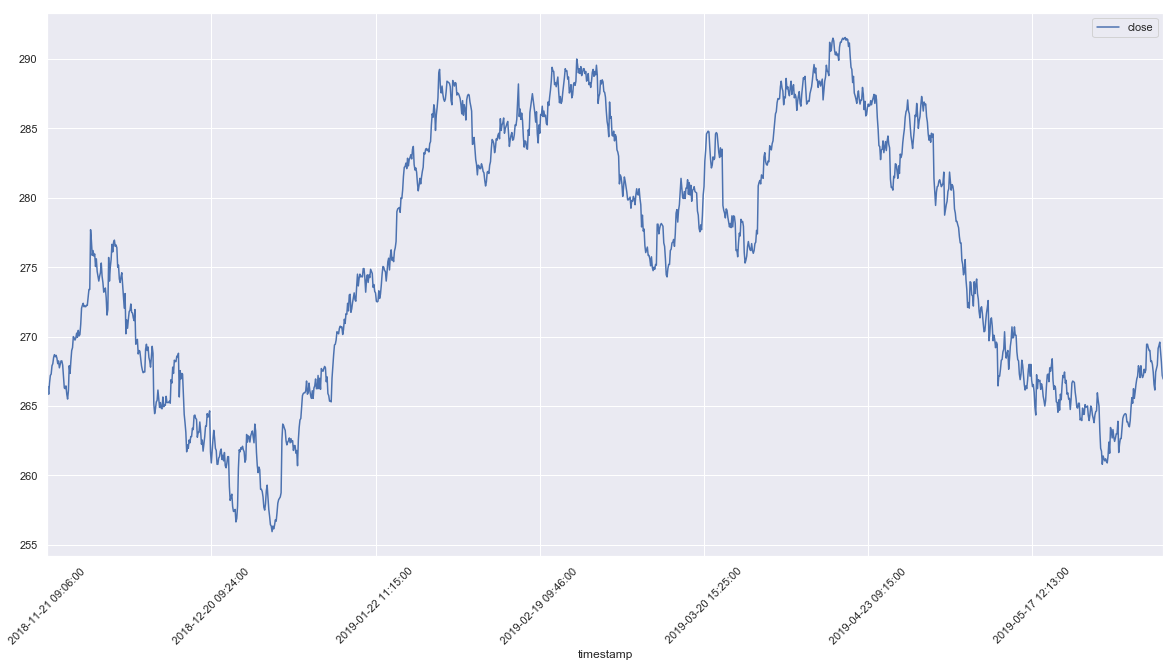

In [112]:
import itertools as it 
#bar = pd.read_csv('dollar_t5000000_d30.csv',index_col='timestamp')
bar = pd.read_csv('dollar_t5300000_d200.csv',index_col='timestamp')
bar = bar.drop(columns=['return'])

tmp = np.log(bar.close).diff().fillna(0)
display(bar.tail())
bar.plot(
    rot=45,
    figsize=(20,10)
)

## 생성

In [113]:
h=0.05 # filter size
tmp_p = list(it.accumulate(tmp, lambda x, y: max(x+y, 0) if (x+y) < h else 0))
tmp_n = list(it.accumulate(tmp, lambda x, y: min(x+y, 0) if (x+y) < -h else 0))
s1 = [index for index, value in enumerate(tmp_p) if value ==0]
s2 = [index for index, value in enumerate(tmp_n) if value ==0]



## 반환
+ [merging based on a timestamp which do not match exactly](https://stackoverflow.com/questions/34880539/pandas-merging-based-on-a-timestamp-which-do-not-match-exactly)

In [114]:
s_p = bar.iloc[s1]
s_m = bar.iloc[s2]

display(s_p.head())
display(s_m.head())

s_t = pd.concat([s_p,s_m],axis = 1,sort=True)
s_t.columns = ['s_p','s_m']
s_t.fillna(method='ffill',inplace=True)
s_t.head()
s_t.tail()

,close
timestamp,
2018-11-21 09:06:00,266.250000
2018-11-21 09:59:00,265.850006
2018-11-23 13:45:00,265.850006
2018-11-23 14:37:00,265.500000
2018-12-10 09:10:00,265.149994


,close
timestamp,
2018-11-21 09:06:00,266.250000
2018-11-21 09:22:00,266.399994
2018-11-21 09:59:00,265.850006
2018-11-21 10:34:00,266.649994
2018-11-21 10:53:00,267.200012


,s_p,s_m
2019-06-07 12:19:00,260.799988,269.600006
2019-06-07 13:20:00,260.799988,268.850006
2019-06-07 14:08:00,260.799988,268.149994
2019-06-07 14:34:00,260.799988,267.200012
2019-06-07 15:01:00,260.799988,266.950012


## 표시

,s_p,s_m
2019-06-07 12:19:00,260.799988,269.600006
2019-06-07 13:20:00,260.799988,268.850006
2019-06-07 14:08:00,260.799988,268.149994
2019-06-07 14:34:00,260.799988,267.200012
2019-06-07 15:01:00,260.799988,266.950012


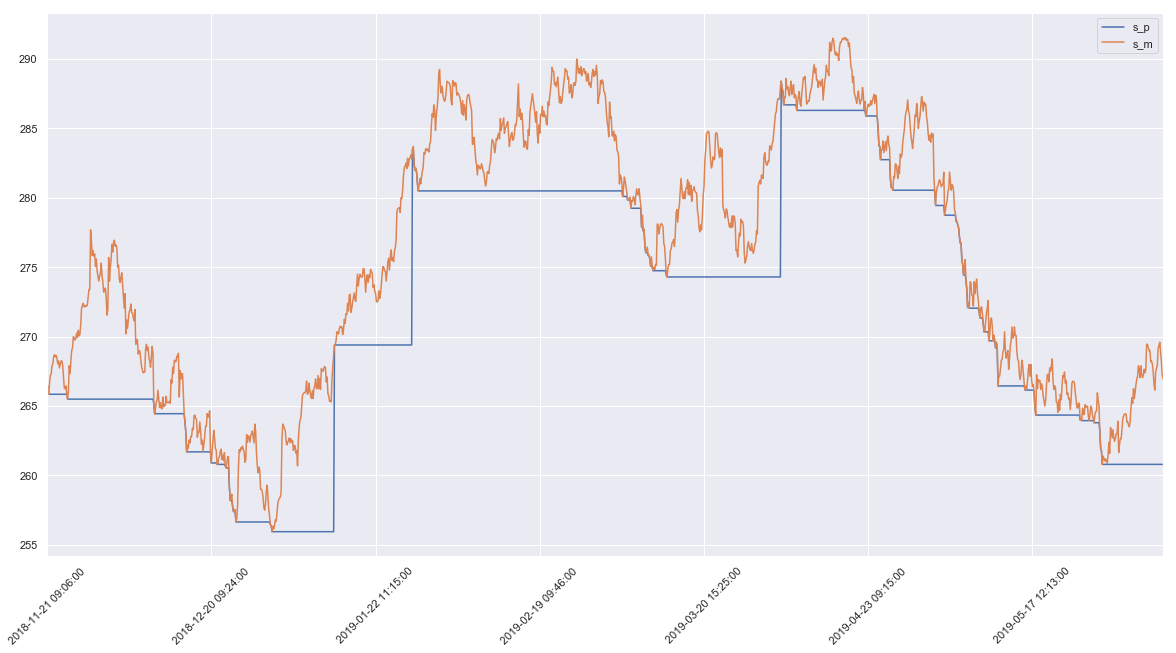

In [115]:
display(s_t.tail())
s_t.plot(
    use_index =True,
    subplots=False,
    sharex =True,
   # xlim=[s_t.index[0],s_t.index[-1]],
    rot =45,
    figsize=(20,10),

)

## 함수

In [131]:
def CUSUM(
    file,
    index='timestamp',
    col='close',
    h=0.05
   ):
    bar = pd.read_csv(file,index_col=index)
    bar = bar.drop(bar.columns.difference([col]), axis=1)
    tmp = np.log(bar.close).diff().fillna(0)
   
    tmp_p = list(it.accumulate(tmp, lambda x, y: max(x+y, 0) if (x+y) < h else 0))
    tmp_n = list(it.accumulate(tmp, lambda x, y: min(x+y, 0) if (x+y) < -h else 0))
    
    s1 = [index for index, value in enumerate(tmp_p) if value ==0]
    s2 = [index for index, value in enumerate(tmp_n) if value ==0]
        
    s_p = bar.iloc[s1]
    s_m = bar.iloc[s2]

    s_t = pd.concat([s_p,s_m],axis = 1,sort=True)
    s_t.columns = ['s_p','s_m']
    s_t.fillna(method='ffill',inplace=True)

    return s_t


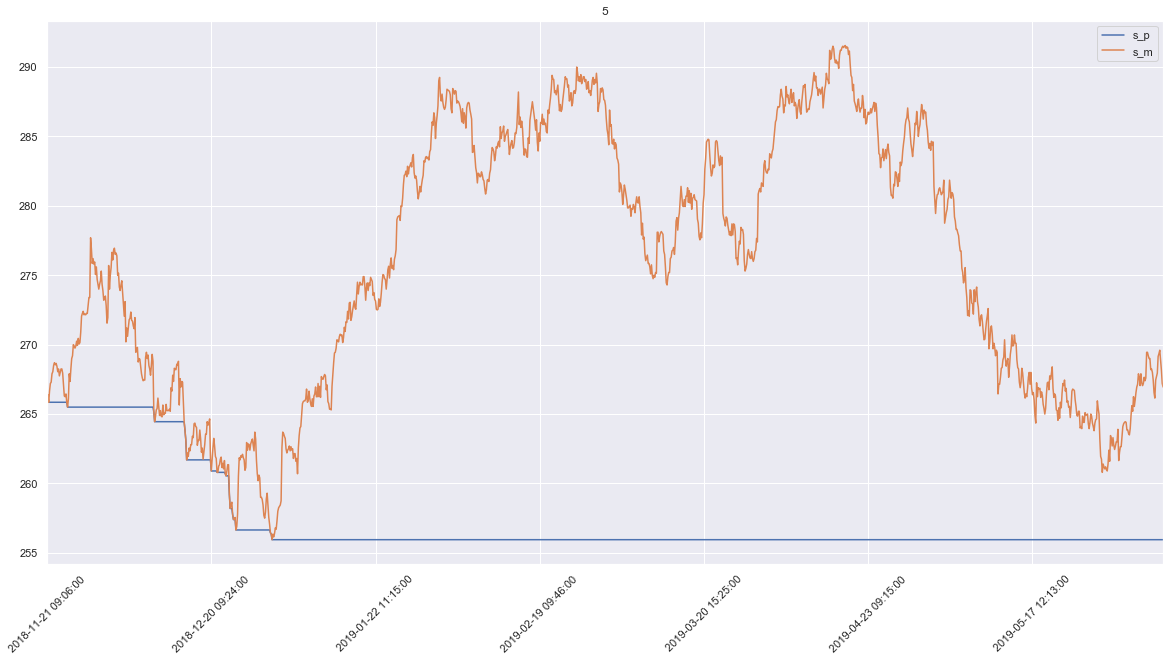

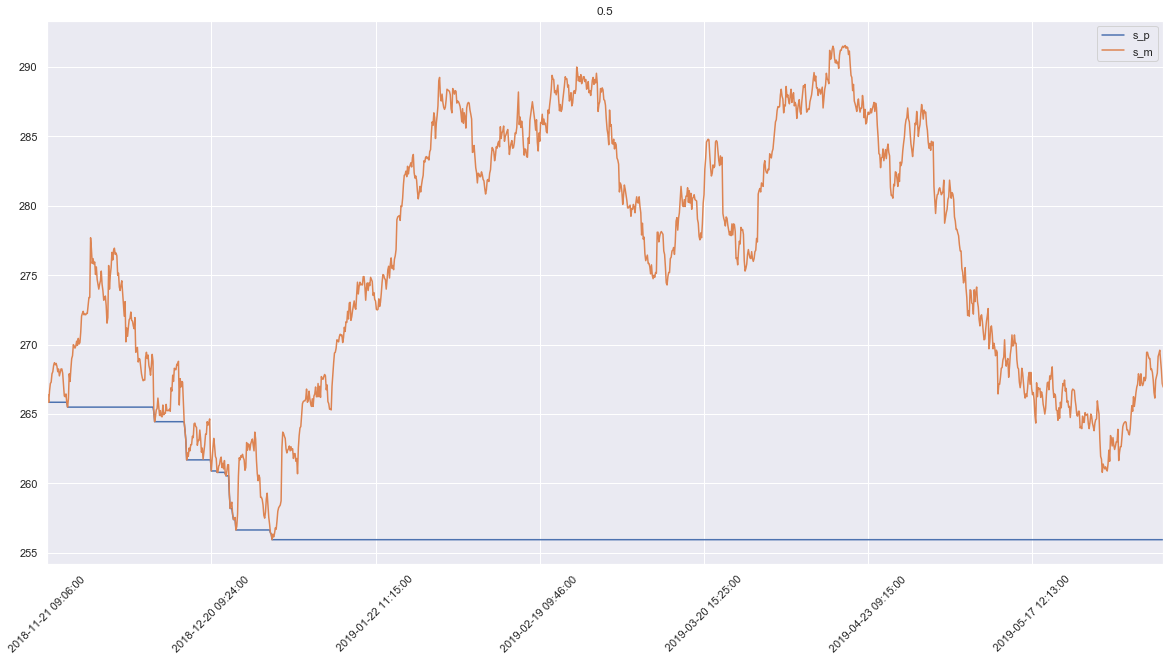

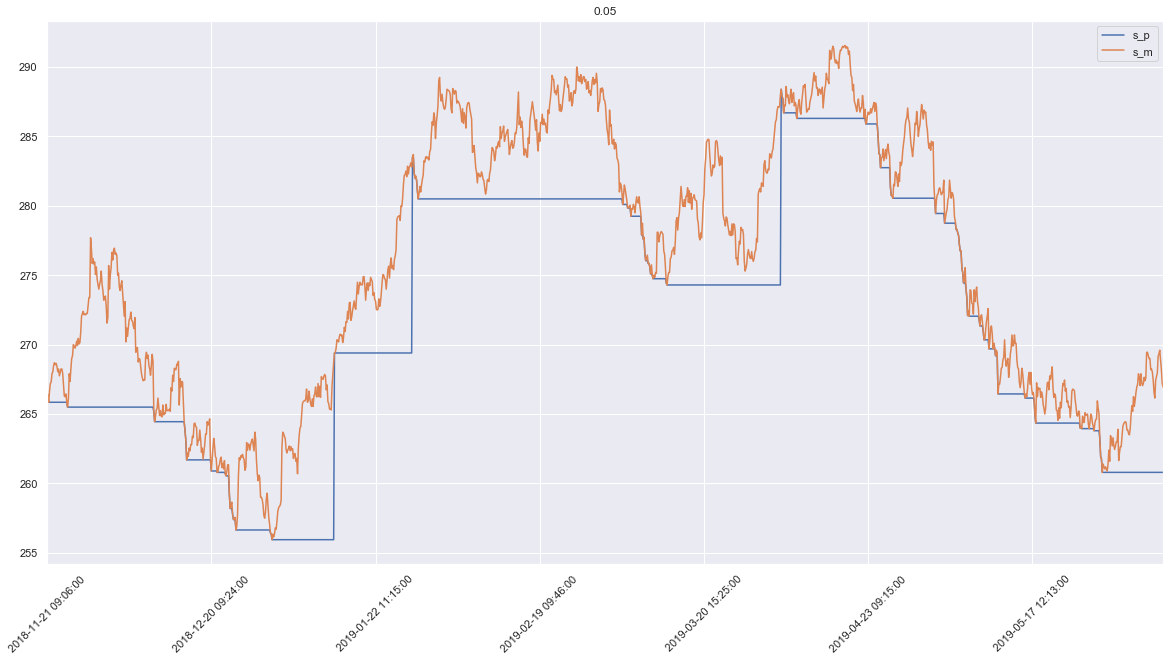

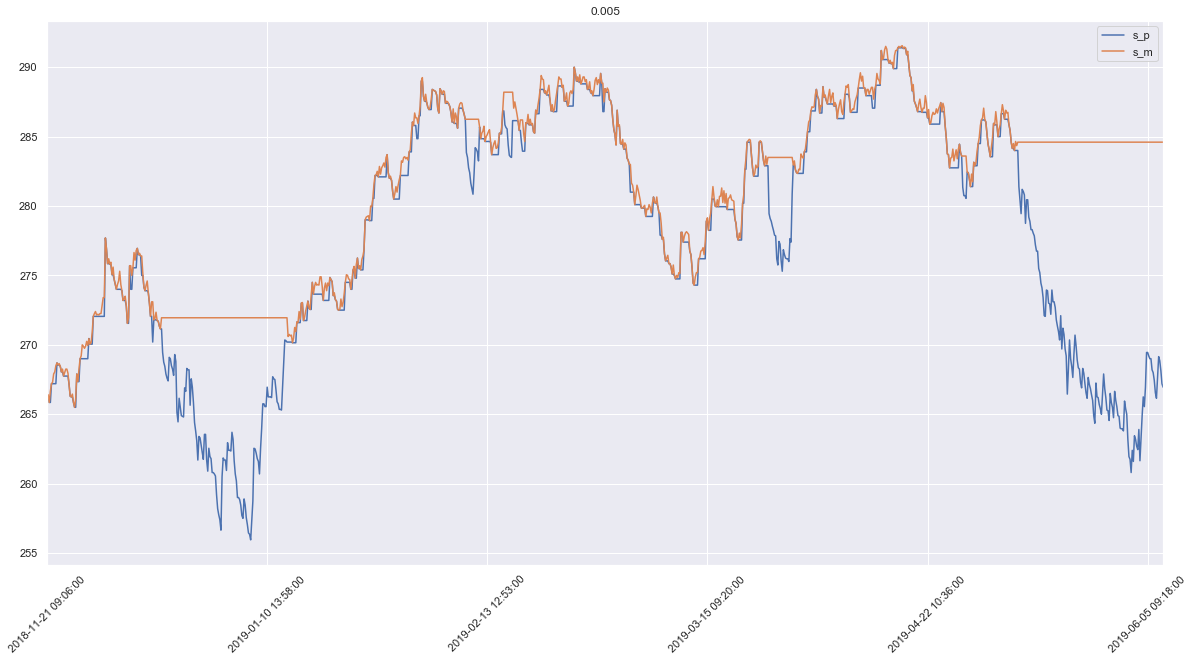

In [138]:
for h_t in [5,0.5,0.05,0.005]:
    s_t = CUSUM('dollar_t5300000_d200.csv',h=h_t)
    s_t.plot(
        use_index =True,
        subplots=False,
        sharex =True,
       # xlim=[s_t.index[0],s_t.index[-1]],
        rot =45,
        figsize=(20,10),
        title=h_t
    )

## 수정

In [ ]:


def CUSUM2(
    file,
    index='timestamp',
    col='close',
    h=0.05
   ):
    bar = pd.read_csv(file,index_col=index)
    bar = bar.drop(bar.columns.difference([col]), axis=1)
    tmp = np.log(bar.close).diff().fillna(0)
   
    tmp_p = list(it.accumulate(tmp, lambda x, y: max(x+y, 0) if (x+y) < h else 0))
    tmp_n = list(it.accumulate(tmp, lambda x, y: min(x+y, 0) if (x+y) < -h else 0))
    
    s1 = [index for index, value in enumerate(tmp_p) if value ==0]
    s2 = [index for index, value in enumerate(tmp_n) if value ==0]
        
    s_p = bar.iloc[s1]
    s_m = bar.iloc[s2]

    s_t = pd.concat([s_p,s_m],axis = 1,sort=True)
    s_t.columns = ['s_p','s_m']
    s_t.fillna(method='ffill',inplace=True)
    
    s_t['s_t'] = np.where(s_t['s_p'] > -s_t['s_m'],s_t['s_p'],s_t['s_m'])
    return s_t

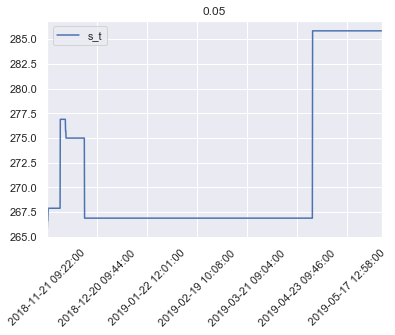

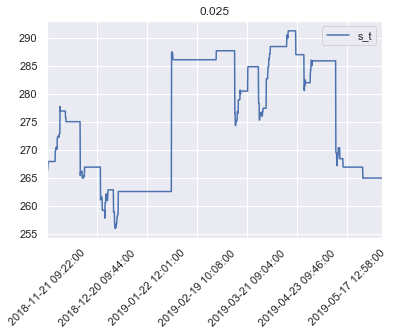

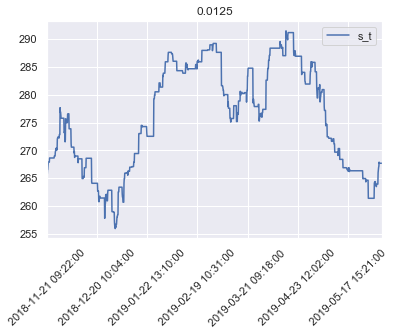

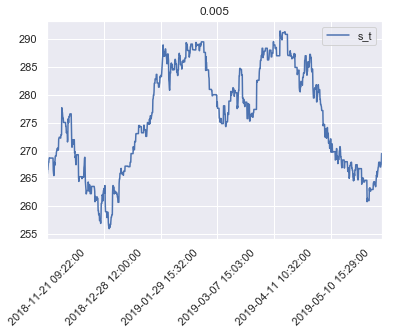

In [187]:
for h_t in [0.05,
            0.025,
            0.0125,
            0.005           
           ]:
    s_t = CUSUM2('dollar_t5300000_d200.csv',h=h_t)
    s_t = s_t.drop(columns=['s_p','s_m'])
    s_t.plot(
        use_index =True,
        subplots=False,
        sharex =True,
       # xlim=[s_t.index[0],s_t.index[-1]],
        rot =45,
        #figsize=(20,10),
        title=h_t
    )

In [190]:
def npMovingAverage(data, window=3):
    weights = np.ones(window) / window
    return np.convolve(data, weights, mode='valid')

def CUSUM3(
    file,
    index='timestamp',
    col='close',
    window=20,
    h=0.05
   ):
    bar = pd.read_csv(file,index_col=index)
    bar = bar.drop(bar.columns.difference([col]), axis=1)
    tmp = np.log(bar.close).diff().fillna(0)
    ma = npMovingAverage(tmp,window)
    tmp = tmp[window-1:]
    tmp = tmp - ma
    tmp_p = list(it.accumulate(tmp, lambda x, y: max(x+y, 0) if (x+y) < h else 0))
    tmp_n = list(it.accumulate(tmp, lambda x, y: min(x+y, 0) if (x+y) < -h else 0))
    
    s1 = [index for index, value in enumerate(tmp_p) if value ==0]
    s2 = [index for index, value in enumerate(tmp_n) if value ==0]
        
    s_p = bar.iloc[s1]
    s_m = bar.iloc[s2]

    s_t = pd.concat([s_p,s_m],axis = 1,sort=True)
    s_t.columns = ['s_p','s_m']
    s_t.fillna(method='ffill',inplace=True)

    s_t['s_t'] = np.where(s_t['s_p'] > -s_t['s_m'],s_t['s_p'],s_t['s_m'])
    return s_t

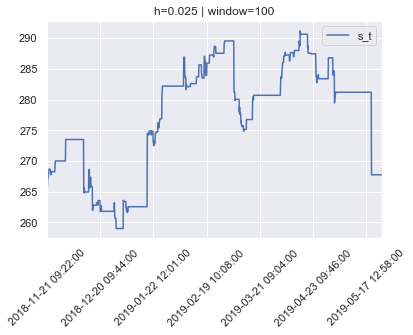

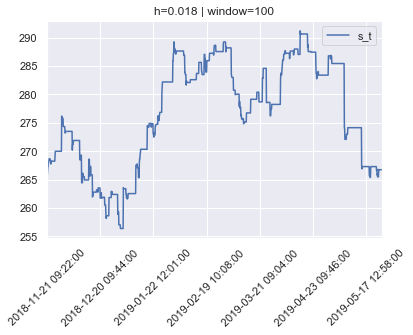

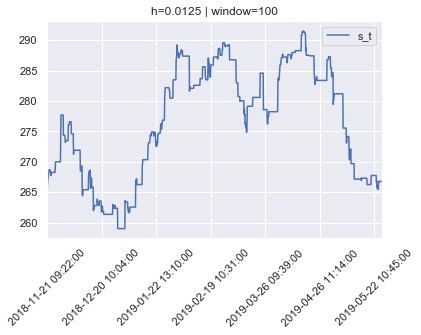

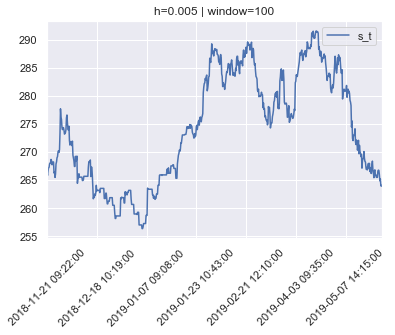

In [194]:
for h_t in [0.025,
            0.018,
            0.0125,
            0.005           
           ]:
    window=100
    s_t = CUSUM3('dollar_t5300000_d200.csv',h=h_t,window=window)
    s_t = s_t.drop(columns=['s_p','s_m'])
    s_t.plot(
        use_index =True,
        subplots=False,
        sharex =True,
       # xlim=[s_t.index[0],s_t.index[-1]],
        rot =45,
        #figsize=(20,10),
        title='h=' + str(h_t) + ' | window='+str(window)
    )

In [152]:
h=0.5
f = lambda x, y: max(x+y, 0) if (x+y) < h else 0

f(0.02,0.1)

0.12000000000000001